# PCA Home Assignment
## Christian Igel, 2021

In [13]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
import seaborn as sns
sns.set_style("ticks")

import matplotlib.pyplot as plt
%matplotlib inline

Load handwritten digits data:

In [2]:
digits = datasets.load_digits()
imshape = digits.images[0].shape  # The 2D image shape
X = digits.images.reshape(digits.images.shape[0],-1)  # Image

Do the PCA:

In [3]:
pca = PCA()
pca.fit(X)

PCA()

Find out if 10 components are enough to explain 80% of the variance:

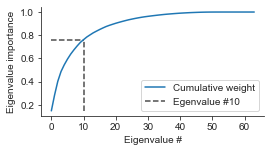

0.7382267688459532


In [108]:
cumvar = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots(1,1,figsize = (4,2))
ax.plot(cumvar,label = "Cumulative weight")
ax.set_xlabel("Eigenvalue #")
ax.set_ylabel("Eigenvalue importance")
ax.vlines(10,min(cumvar),cumvar[10],ls= '--',color="black",alpha = 0.7,label = "Egenvalue #10")
ax.hlines(cumvar[10],0,10,ls= '--',color="black",alpha = 0.7)

sns.despine()
plt.legend()
plt.show()
print(cumvar[9])

Plot the eigenspectrum:

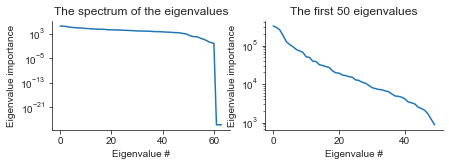

In [104]:
fig, axs = plt.subplots(1,2,figsize = (7,2))
axs[0].set_yscale("log")

axs[0].plot((pca.singular_values_**2))
axs[0].set_xlabel("Eigenvalue #")
axs[0].set_ylabel("Eigenvalue importance")
axs[0].set_title("The spectrum of the eigenvalues")
axs[1].plot((pca.singular_values_**2)[:50])
axs[1].set_yscale("log")
axs[1].set_xlabel("Eigenvalue #")
axs[1].set_ylabel("Eigenvalue importance")
axs[1].set_title("The first 50 eigenvalues")


sns.despine()

Plot "eigendigits":

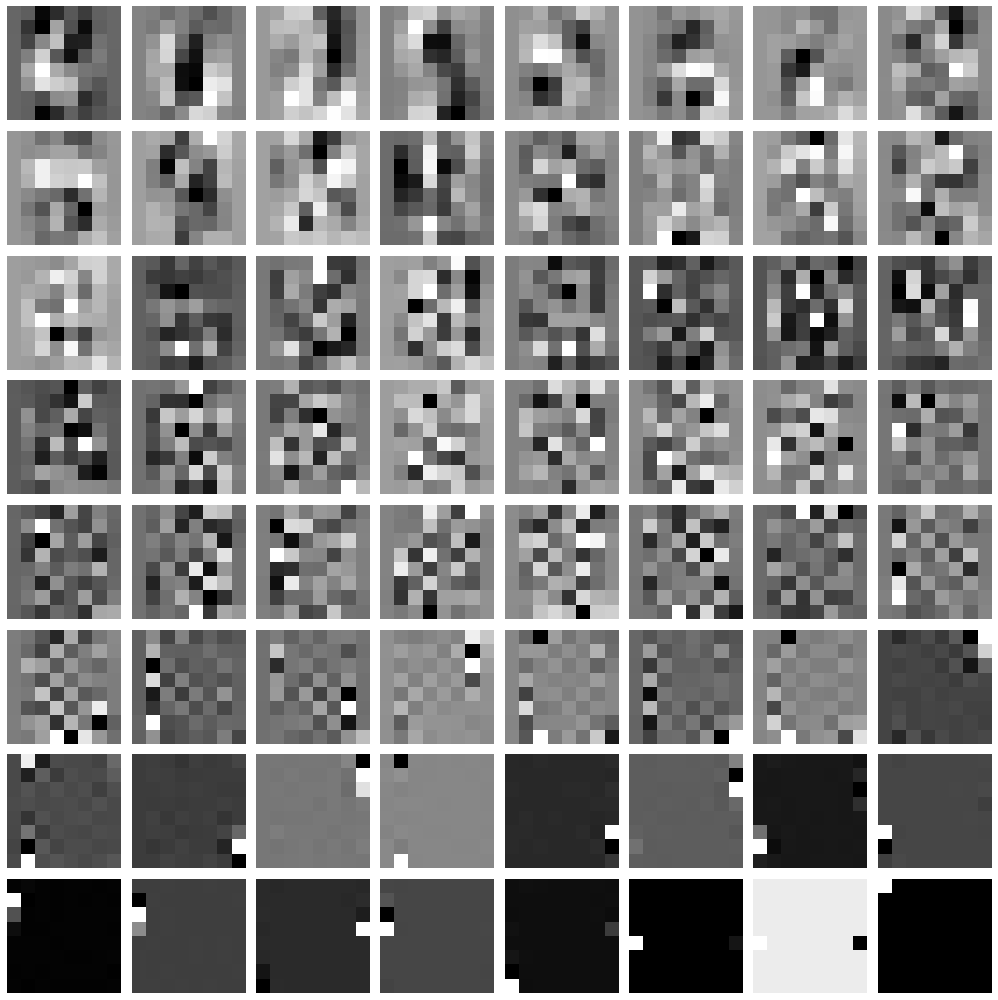

In [11]:
fig, axs = plt.subplots(8,8,figsize = (14,14))
axs = axs.flatten()
for i in range(len(pca.components_)):
    axs[i].imshow(pca.components_[i].reshape(imshape),cmap=plt.cm.gray)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

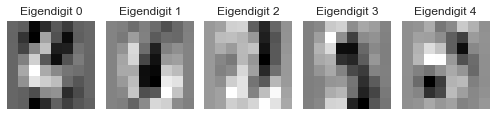

In [102]:
fig, axs = plt.subplots(1,5,figsize = (7,3))

for i in range(len(axs)):
    axs[i].imshow(pca.components_[i].reshape(imshape),cmap=plt.cm.gray)
    axs[i].axis('off')
    axs[i].set_title("Eigendigit "+str(i))

plt.tight_layout()
plt.show()